In [1]:
import numpy as np

In [2]:
from dragonn.models import SequenceDNN_Regression

Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5005)
/usr/local/anaconda3/envs/regression_dragonn_new/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [3]:
model = SequenceDNN_Regression.load('models/models/100n1_100n2_8w1_15w2.arch.json', 'models/models/100n1_100n2_8w1_15w2.weights.h5')

In [4]:
letterindex = {'A': 0, 'a': 0, 'T': 1, 't': 1, 'C': 2, 'c': 2, 'G': 3, 'g': 3, 'N': -1, 'n': -1}

def model_input(seqs):
    mi = np.zeros((len(seqs), 1, 4, len(seqs[0])))
    for j in xrange(len(seqs)):
        for i in xrange(len(seqs[0])):
            mi[j][0][letterindex[seqs[j][i]]][i] = 1
    return mi

In [30]:
lkref, lkalt = [], []

lkf = open("lks.txt", 'r').readlines()
for line in lkf:
    if len(line.split()) == 2:
        lkref.append(line.split()[0])
        lkalt.append(line.split()[1])
del lkref[-1]
del lkalt[-1]
add = [('GAAGTCATCTCTGCACCCAACACACAGGGCCAATCAGCAGGTGTGGCAGGTGTTCCGTCTTCCTGTTGGAGCGATCTTCTAGGTCCTAGTTCCATCTCCAGCATGGCGTGTGACTCTGAGAAGGTCATCAACCAAGCTCAGTTTTAG',
  'GAAGTCATCTCTGCACCCAACACACAGGGCCAATCAGCAGGTGTGGCAGGTGTTCCGTCTTCCTGTTGGAGCTATCTTCTAGGTCCTAGTTCCATCTCCAGCATGGCGTGTGACTCTGAGAAGGTCATCAACCAAGCTCAGTTTTAG'),
 ('AATTTCTTGATTTGGGACCAGTGTAATTGACTAAATATTGTATTTTATTGTTGGCCTTCAGGCATTCAGGAGGCCATGACTACTACAGGGAAAATTCTGGGATCATAAAATTTAGCCAAGCATGAAACTAAAAACTGGGAACATGAG',
  'AATTTCTTGATTTGGGACCAGTGTAATTGACTAAATATTGTATTTTATTGTTGGCCTTCAGGCATTCAGGAGACCATGACTACTACAGGGAAAATTCTGGGATCATAAAATTTAGCCAAGCATGAAACTAAAAACTGGGAACATGAG'),
 ('CCTTTGCACCAATCTAATAATATAAATACAGAAAGTTCACTGTCCAATTACAATGCAGCATGGTGAGCGCATCCTAGGATGAATGGAAGTGCTATGGGCTTGCCGGTGAAATATTTAATCCTCATACCTCTGCACAGATGTTTTACT',
  'CCTTTGCACCAATCTAATAATATAAATACAGAAAGTTCACTGTCCAATTACAATGCAGCATGGTGAGCGCATTCTAGGATGAATGGAAGTGCTATGGGCTTGCCGGTGAAATATTTAATCCTCATACCTCTGCACAGATGTTTTACT'),
 ('AAATTTAATTTGTCTAATCCATAGTTTAACTAGAGTTTCCACTCAAACCAAAAGTAAATCTTACCTAGAAAATAATGTACCTGGCCGGGCACAGTGGCTCTTGCCTGTAATCCCAGCACTTTGGGAGGCCAAGGCGGATGGATTACG',
  'AAATTTAATTTGTCTAATCCATAGTTTAACTAGAGTTTCCACTCAAACCAAAAGTAAATCTTACCTAGAAAAGAATGTACCTGGCCGGGCACAGTGGCTCTTGCCTGTAATCCCAGCACTTTGGGAGGCCAAGGCGGATGGATTACG'),
 ('CTGGATTTAAACCTTTGCTCCTCCATTTACTAATTATGACTTGACCAAATGACTTAGCCTCTTTAAACTTTGGTTTCTCATCCATCTGACAAATAGTTATAATAATGGTATCCACACTTCAGTATTGTTGAGAGGGTTAAATGAAAT',
  'CTGGATTTAAACCTTTGCTCCTCCATTTACTAATTATGACTTGACCAAATGACTTAGCCTCTTTAAACTTTGATTTCTCATCCATCTGACAAATAGTTATAATAATGGTATCCACACTTCAGTATTGTTGAGAGGGTTAAATGAAAT'),
 ('TTTATTCATTAGTCTTCCTCCTCACATATCACTTGCTTTCTTTTCTGAGTCAGTTTAACTTCGAGCCTATAGTTTTTTTCTTTTCTTCCTTCTCCCCATTGCACCAAAATAATGTGAAGAAAAAGACAAGTCAGAATTTCTGTCCCC',
  'TTTATTCATTAGTCTTCCTCCTCACATATCACTTGCTTTCTTTTCTGAGTCAGTTTAACTTCGAGCCTATAGCTTTTTTCTTTTCTTCCTTCTCCCCATTGCACCAAAATAATGTGAAGAAAAAGACAAGTCAGAATTTCTGTCCCC'),
 ('CCTACAATAGCTTGTCTTGAAGCCAGACCTCAGCCCAATAGTCCAGTATATAAAAACCCATGAATATGTAAAGTAGACCTACTGAAGAAGAGGAAAACCAAATTACTCCAGAAAGGCACCAGTTTTCTCCTTCATACTCATGTTCAA',
  'CCTACAATAGCTTGTCTTGAAGCCAGACCTCAGCCCAATAGTCCAGTATATAAAAACCCATGAATATGTAAATTAGACCTACTGAAGAAGAGGAAAACCAAATTACTCCAGAAAGGCACCAGTTTTCTCCTTCATACTCATGTTCAA'),
 ('CAATTTTGTGGGGCAAAGTTGGCAGATCCCAGCTTTAATTTCTCTTTCATGTTTTCATAGCATCTTGAAATGGCTTTTAAGCTTCTATTTTTTTTTCCAATTCATCCTTTGGCAGGAGGACCATAACCCTTATAATCATGGACAGGC',
  'CAATTTTGTGGGGCAAAGTTGGCAGATCCCAGCTTTAATTTCTCTTTCATGTTTTCATAGCATCTTGAAATGCCTTTTAAGCTTCTATTTTTTTTTCCAATTCATCCTTTGGCAGGAGGACCATAACCCTTATAATCATGGACAGGC'),
 ('ACACACCTGTAGTCCCAGCTACTTGGGAGGCTGAGGCAGGAGGATCACTTGAGCCCAGGAGGCTGAGGCTACTGTGAGCTGTGGTTGTGCCACTGTACTACAGCCTCGGTGACAGGGTGAGACCCTGTGTCTAAAACAAAACAAAAC',
  'ACACACCTGTAGTCCCAGCTACTTGGGAGGCTGAGGCAGGAGGATCACTTGAGCCCAGGAGGCTGAGGCTACAGTGAGCTGTGGTTGTGCCACTGTACTACAGCCTCGGTGACAGGGTGAGACCCTGTGTCTAAAACAAAACAAAAC'),
 ('TGAGGGTCACGTGATGGGGACAAAGGGAGACAGGAACAACAGGTTCAGATCAGGACCTCCAGATCTGGTTAGACAGGACCTCCCAGGGTAGCCAAGGAGTCTGGGTTCGATTTTATTTTGCAGGGAGCGTTTTATGCTAGAGTGATG',
  'TGAGGGTCACGTGATGGGGACAAAGGGAGACAGGAACAACAGGTTCAGATCAGGACCTCCAGATCTGGTTAGGCAGGACCTCCCAGGGTAGCCAAGGAGTCTGGGTTCGATTTTATTTTGCAGGGAGCGTTTTATGCTAGAGTGATG'),
 ('AGAGACAAGAACCCAGCAGTGTGTGCAGAGTCAAGGCCGTTCAGGGAGCTCTGCAAATGCCCGTTCCACGCTAGCTAAAATGCACGGTTCCCCTCTCCCCGGAAGAAAAGGCAGCAGCGTGGGTTTTTTGTTTTTTTTTCTTTTCTC',
  'AGAGACAAGAACCCAGCAGTGTGTGCAGAGTCAAGGCCGTTCAGGGAGCTCTGCAAATGCCCGTTCCACGCTGGCTAAAATGCACGGTTCCCCTCTCCCCGGAAGAAAAGGCAGCAGCGTGGGTTTTTTGTTTTTTTTTCTTTTCTC'),
 ('GGCACTGTGCCCCAGAATGGCCCCACCCATGCAGGAGGGCACCTTCCCTCCTCACTGTGCTGGCTTCTTTTAACAAATAGCCCTATCTATGAGCTCCCTTGTTCCTTCCAACCATTCTAAAGATAGGGCAGGCACCAAGGCCAGGGG',
  'GGCACTGTGCCCCAGAATGGCCCCACCCATGCAGGAGGGCACCTTCCCTCCTCACTGTGCTGGCTTCTTTTATCAAATAGCCCTATCTATGAGCTCCCTTGTTCCTTCCAACCATTCTAAAGATAGGGCAGGCACCAAGGCCAGGGG'),
 ('GCCTTGGGTCCATGGGGAGAGCTTGGCTCAGGAAGCCGGTGCTGCCTCTATCACCTCTGAGTTTCCAAGCCATACTCTCTCACCCCATCCCAGCTTGGGAAACAGCCAGCATCTTGCTGGCCTCTTGGTGGAGTGTTGCTGATCCAT',
  'GCCTTGGGTCCATGGGGAGAGCTTGGCTCAGGAAGCCGGTGCTGCCTCTATCACCTCTGAGTTTCCAAGCCACACTCTCTCACCCCATCCCAGCTTGGGAAACAGCCAGCATCTTGCTGGCCTCTTGGTGGAGTGTTGCTGATCCAT'),
 ('GATTTCCTGTGCACACTAAAGTTTGAGAAGCACAAGATTAGGAGTCAAAATCCCTGAGTTCCTGGTCCAGCTATTGCTATCAAATTGCTGTGTGGTTTTGCAGGACTTGCTTGACCTCTCTGGGTGCTAGAATTTCTTCCTCTGGGC',
  'GATTTCCTGTGCACACTAAAGTTTGAGAAGCACAAGATTAGGAGTCAAAATCCCTGAGTTCCTGGTCCAGCTGTTGCTATCAAATTGCTGTGTGGTTTTGCAGGACTTGCTTGACCTCTCTGGGTGCTAGAATTTCTTCCTCTGGGC')]
for pair in add:
    lkref.append(pair[0])
    lkalt.append(pair[1])

In [31]:
lvref, lvalt = [], []

lvf = open("lvs.txt", 'r').readlines()
for line in lvf:
    if len(line.split()) == 2:
        lvref.append(line.split()[0])
        lvalt.append(line.split()[1])
add = ('AATGATATGAAATGAAATCAATGTACATAAAAAATAGTCCCTAGTAATAGAAATCAGAAAGTAGTTGCCTAGGGGAAGGAGACATTGACTGGAAAGAAAAAAATGAAGGATTATTCTGGGGCGATGGAAATATTGTATCTCTTTTTG',
 'AATGATATGAAATGAAATCAATGTACATAAAAAATAGTCCCTAGTAATAGAAATCAGAAAGTAGTTGCCTAGAGGAAGGAGACATTGACTGGAAAGAAAAAAATGAAGGATTATTCTGGGGCGATGGAAATATTGTATCTCTTTTTG')
lvref.append(add[0])
lvalt.append(add[1])

In [36]:
lvref = [seq[:145] for seq in lvref]
lvalt = [seq[:145] for seq in lvalt]
lkref = [seq[:145] for seq in lkref]
lkalt = [seq[:145] for seq in lkalt]

In [35]:
lvrefouts.shape

(222, 4)

In [37]:
lvrefouts = model.predict(model_input(lvref))
lvaltouts = model.predict(model_input(lvalt))

In [38]:
lkrefouts = model.predict(model_input(lkref))
lkaltouts = model.predict(model_input(lkalt))

In [39]:
lvdiffsM = [lvaltouts[i][0] - lvrefouts[i][0] for i in xrange(len(lvrefouts))]
lvdiffsS = [lvaltouts[i][2] - lvrefouts[i][2] for i in xrange(len(lvrefouts))]
lkdiffsM = [lkaltouts[i][1] - lkrefouts[i][1] for i in xrange(len(lkrefouts))]
lkdiffsS = [lkaltouts[i][3] - lkrefouts[i][3] for i in xrange(len(lkrefouts))]

In [40]:
np.mean(lvdiffsM), np.mean(lvdiffsS), np.mean(lkdiffsM), np.mean(lkdiffsS)

(-0.0053242530405252907,
 -0.0083676476056712707,
 0.0014643001062954616,
 0.0017867222849313909)

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

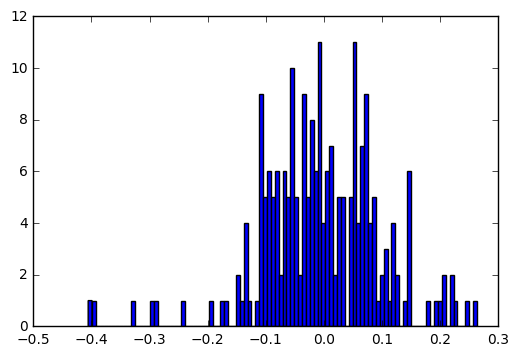

In [43]:
plt.hist(lvdiffsM, bins=100)
plt.show()

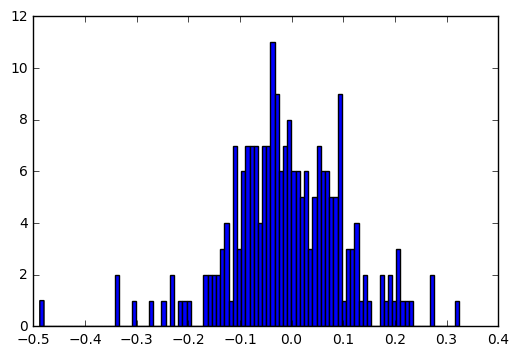

In [44]:
plt.hist(lvdiffsS, bins=100)
plt.show()

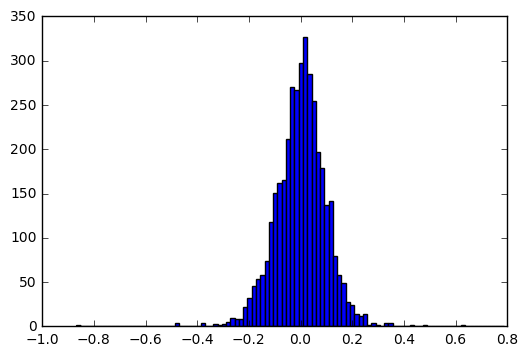

In [45]:
a = plt.hist(lkdiffsM, bins=100)
plt.show()

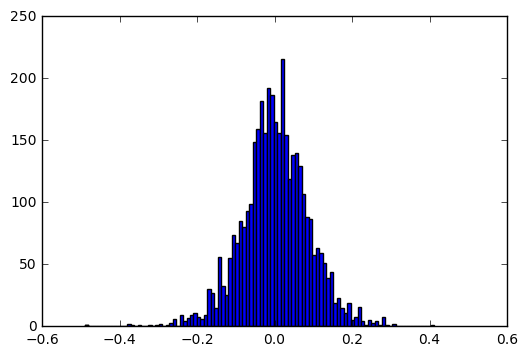

In [46]:
plt.hist(lkdiffsS, bins=100)
plt.show()

In [55]:
from scipy.stats import spearmanr
spearmanr(lvdiffsS, lvdiffsM)

SpearmanrResult(correlation=0.88669191887340137, pvalue=1.1960195729274781e-75)

In [57]:
a, b = zip(*sorted(zip(lvdiffsS, range(len(lvdiffsS)))))

In [58]:
c, d = zip(*sorted(zip(lvdiffsM, range(len(lvdiffsM)))))

In [60]:
zip(b, d)

[(38, 217),
 (69, 69),
 (102, 102),
 (157, 138),
 (217, 38),
 (175, 144),
 (138, 179),
 (179, 73),
 (73, 84),
 (144, 41),
 (140, 45),
 (123, 99),
 (35, 212),
 (62, 81),
 (15, 39),
 (39, 140),
 (202, 63),
 (84, 214),
 (41, 115),
 (170, 116),
 (63, 13),
 (29, 175),
 (128, 194),
 (124, 124),
 (17, 133),
 (78, 88),
 (196, 78),
 (14, 157),
 (93, 30),
 (21, 49),
 (214, 17),
 (212, 123),
 (99, 160),
 (30, 198),
 (152, 128),
 (150, 147),
 (66, 93),
 (81, 150),
 (133, 201),
 (53, 29),
 (31, 85),
 (154, 170),
 (200, 145),
 (97, 129),
 (45, 154),
 (43, 35),
 (209, 14),
 (181, 202),
 (88, 59),
 (36, 164),
 (153, 3),
 (147, 200),
 (103, 171),
 (3, 20),
 (135, 43),
 (115, 209),
 (164, 66),
 (20, 97),
 (85, 152),
 (18, 117),
 (204, 52),
 (198, 218),
 (218, 9),
 (201, 18),
 (117, 162),
 (145, 11),
 (129, 83),
 (194, 37),
 (54, 62),
 (98, 180),
 (83, 48),
 (162, 153),
 (120, 141),
 (184, 143),
 (203, 178),
 (90, 53),
 (187, 103),
 (100, 107),
 (56, 100),
 (139, 199),
 (48, 158),
 (44, 54),
 (126, 149),

In [61]:
e, f = zip(*sorted(zip(lkdiffsS, range(len(lkdiffsS)))))
g, h = zip(*sorted(zip(lkdiffsM, range(len(lkdiffsM)))))
zip(f, h)

[(2841, 2300),
 (2733, 1977),
 (3562, 260),
 (932, 282),
 (2999, 657),
 (2595, 724),
 (1058, 2841),
 (3540, 2595),
 (2300, 1058),
 (3463, 2733),
 (3741, 3562),
 (2510, 932),
 (538, 2510),
 (3270, 3540),
 (1284, 2530),
 (2345, 3471),
 (1687, 1559),
 (1148, 2405),
 (1841, 2999),
 (2523, 2351),
 (2351, 2102),
 (1558, 3432),
 (2102, 580),
 (546, 2408),
 (867, 3228),
 (616, 2846),
 (1746, 1687),
 (1071, 1746),
 (1847, 3393),
 (1977, 1862),
 (2047, 3270),
 (1559, 3548),
 (2408, 2213),
 (1563, 2438),
 (2194, 1658),
 (2497, 867),
 (2577, 3422),
 (1116, 2730),
 (3048, 3565),
 (3683, 3298),
 (304, 1284),
 (896, 1071),
 (1365, 3190),
 (2014, 538),
 (3248, 1852),
 (1205, 3463),
 (2935, 1940),
 (3718, 608),
 (1397, 2809),
 (1153, 3642),
 (1833, 3183),
 (3422, 1143),
 (2683, 1558),
 (2369, 3388),
 (1658, 113),
 (3298, 491),
 (3228, 927),
 (1962, 1912),
 (239, 3079),
 (2377, 1702),
 (3186, 361),
 (315, 1148),
 (1649, 1841),
 (2675, 683),
 (1322, 690),
 (1702, 1397),
 (3802, 2156),
 (1636, 347),
 (186

# Generating background distribution

In [57]:
hepg2_peaks = [line[:-1].upper().replace('N', 'A') for line in open("hepg2_501.txt", 'r').readlines()[1::2]]

In [58]:
k562_peaks = [line[:-1].upper().replace('N', 'A') for line in open("k562_501.txt", 'r').readlines()[1::2]]

In [62]:
hepg2_peaks_input = []
for seq in hepg2_peaks:
    mid = len(seq) / 2
    hepg2_peaks_input.append(seq[mid - 72 : mid + 73])
k562_peaks_input = []
for seq in k562_peaks:
    mid = len(seq) / 2
    k562_peaks_input.append(seq[mid - 72 : mid + 73])

In [64]:
hepg2_peaks_input_A = [seq[]]

'TGAAGTCCTCCTCAACTGGAAGCCCAAGCTTCAGGCCAGGAACTTCCCCAGCAGAGGCAGCCTTCCCCAGGGGGCCAAGACCTTGGCAGAATGTCTGGGGTGCTCATGGCAGCGCCTCTCACCTGGCCCCTGCCAAATCAGTTTC'